
<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Three: Classifier training and performance assessment. </h2>	

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
%matplotlib inline

In [204]:
# Split the data into a training set, and test set 
def df_train_test_split(df):
    y = df.iloc[:,0]
    X = df.iloc[:,1:]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=62)
    return X_train, X_test, y_train, y_test

# Calculate the accuracy percentage of the predicted values
def accuracy(pred, actual):
    return accuracy_score(pred, actual)

# Fit model
def fit_predict(model):
    model.fit(X_train, y_train)
    y_predict_on_train = model.predict(X_train)
    y_predict_on_test = model.predict(X_test)
    accuracy_on_train = accuracy(y_predict_on_train, y_train)
    accuracy_on_test = accuracy(y_predict_on_test, y_test)
    
    y_predict_train.append(y_predict_on_train)
    y_predict_test.append(y_predict_on_test)
    accuracy_train.append(accuracy_on_train)
    accuracy_test.append(accuracy_on_test)
    classifier.append(model)
    
    print(".", end="")

### Data

In [207]:
# Read data from nb2
feature = pd.read_hdf("feature.h5", "data")
print("feature", feature.shape)
del feature["Pictures"]
# del feature["resized_Pictures"]
# del feature["std_red"]
# del feature["std_green"]
# del feature["std_blue"]
del feature["canny"]
feature.head()

feature (1501, 25)


,Encoding,size,avg_red,avg_green,avg_blue,avg_gray,std_red,std_green,std_blue,std_grey,...,avg_y,avg_cb,avg_cr,std_y,std_cb,std_cr,avg_hog,std_hog,svd,canny_svd
0,0.0,0.195816,0.719042,0.693139,0.584908,0.794578,0.221203,0.251137,0.312346,0.354078,...,0.654084,0.450585,0.521069,0.209788,0.057982,0.042520,0.069350,0.086811,"[-0.9411725618842666, 0.008966214811940402, -0...","[-0.006201030396643063, 0.0003885448107720387,..."
1,0.0,0.221352,0.826431,0.742275,0.646295,0.920591,0.216836,0.292104,0.276149,0.315872,...,0.712441,0.447331,0.545779,0.222930,0.024625,0.069641,0.074722,0.082233,"[-0.9452094848143205, -0.1284002312458272, -0....","[-0.006201030396643063, 0.0003885448107720387,..."
2,0.0,0.194535,0.667152,0.579563,0.438250,0.696626,0.252515,0.267002,0.352605,0.448270,...,0.569144,0.426911,0.550525,0.219960,0.101463,0.074436,0.068713,0.085799,"[-0.9194251189689553, -0.04598015488281377, 0....","[-0.006201030396643063, 0.0003885448107720387,..."
3,0.0,0.200430,0.596705,0.520189,0.305558,0.672473,0.253041,0.246156,0.327109,0.379313,...,0.508131,0.396350,0.550898,0.210079,0.088122,0.061079,0.074841,0.080767,"[-0.8658767978779213, 0.005307098609816353, 0....","[0.011034498091142122, 0.012793216648073858, -..."
4,0.0,0.208560,0.578031,0.590215,0.338247,0.624215,0.289629,0.279945,0.370162,0.447237,...,0.541838,0.393098,0.514607,0.243142,0.105869,0.027735,0.069497,0.086694,"[-0.887418659157311, 0.015802314068069624, 0.1...","[-0.006201030396643063, 0.0003885448107720387,..."


In [209]:
# Split the data
def unroll(X):
    X = np.array(X)
    X_unroll = []
    for i in range(len(X)):
        list_ = np.append(X[i][:-2], X[i][-2][:5]) # flatten the svd array
        list_ = np.append(list_, X[i][-1][:1]) # flatten the svd array        
        X_unroll.append(list_)
    return np.array(X_unroll)

X_train, X_test, y_train, y_test = df_train_test_split(feature)
X_train = unroll(X_train)
X_test = unroll(X_test)
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

print(X_train[2])

X_train (1200, 26)
X_test (301, 26)
y_train (1200,)
y_test (301,)
[0.2574 0.301928607340372 0.5354872251931075 0.3447881073175191
 0.6993171839054191 0.21631315198758752 0.12256673135009635
 0.14006653501653069 0.25588264693089324 0.9533333333333334
 0.5383051658163265 0.061421911421911425 0.4439884560187986
 0.45282162304672124 0.41299932758227287 0.11648973944932269
 0.01632503802205449 0.0743017295058447 0.0737162282733878
 0.08313601324943662 -0.8139595127657216 -0.29323037231684457
 -0.217250898157557 0.11353140677849262 -0.00424522974151218
 -0.006201030396643063]


<h3>  Train models using all of the following methods below. Be sure to drop the actual image column, and the encoding</h3>	Take note of the differences in accuracy, and methods.


### Logistic Regression

In [210]:
from sklearn.linear_model import LogisticRegression

y_predict_train = []
y_predict_test = []
accuracy_train = []
accuracy_test = []
classifier = []

Logistic = LogisticRegression(random_state=42, solver='lbfgs', C=0.1, max_iter=5000)
fit_predict(Logistic)
Logistic = LogisticRegression(random_state=42, solver='lbfgs', C=1, max_iter=5000)
fit_predict(Logistic)
Logistic = LogisticRegression(random_state=42, solver='lbfgs', C=10, max_iter=5000)
fit_predict(Logistic)

Logistic = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', C=0.1, max_iter=5000)
fit_predict(Logistic)
Logistic = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', C=1, max_iter=5000)
fit_predict(Logistic)
Logistic = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', C=10, max_iter=5000)
fit_predict(Logistic)

Logistic = LogisticRegression(random_state=42, penalty='l1', C=0.1, max_iter=5000)
fit_predict(Logistic)
Logistic = LogisticRegression(random_state=42, penalty='l1', C=1, max_iter=5000)
fit_predict(Logistic)
Logistic = LogisticRegression(random_state=42, penalty='l1', C=10, max_iter=5000)
fit_predict(Logistic)

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


..

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


.....

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


.

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


.

In [211]:
logistic = pd.DataFrame({
    "accuracy_train": accuracy_train,
    "accuracy_test": accuracy_test,
    "classifier": classifier})
logistic.head()

,accuracy_train,accuracy_test,classifier
0,0.275000,0.275748,"LogisticRegression(C=0.1, class_weight=None, d..."
1,0.371667,0.342193,"LogisticRegression(C=1, class_weight=None, dua..."
2,0.469167,0.372093,"LogisticRegression(C=10, class_weight=None, du..."
3,0.285000,0.295681,"LogisticRegression(C=0.1, class_weight=None, d..."
4,0.381667,0.352159,"LogisticRegression(C=1, class_weight=None, dua..."


In [212]:

for i in range(len(classifier)):
    logistic_y_predict = pd.DataFrame({
        "pred": y_predict_test[i],
        "actual": y_test.iloc[i]})
    try:
        os.stat("NB3_df")
    except:
        os.mkdir("NB3_df")       
    logistic_y_predict.to_hdf("NB3_df/logistic_y_predict" + "_c" + str(i + 1) + ".h5", "data", mode="w")
logistic_y_predict.head()

,pred,actual
0,19.0,14.0
1,14.0,14.0
2,12.0,14.0
3,14.0,14.0
4,16.0,14.0


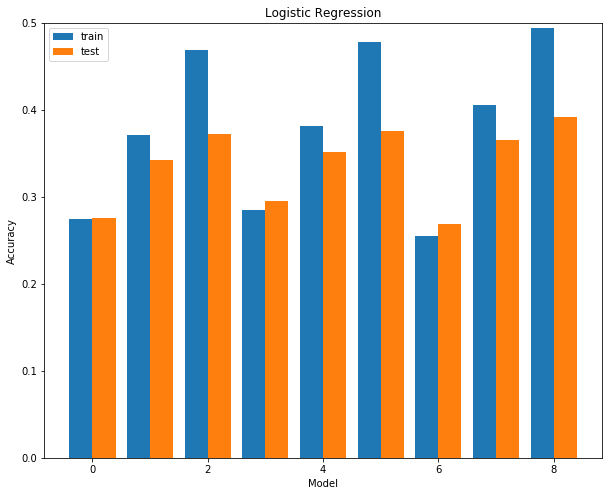

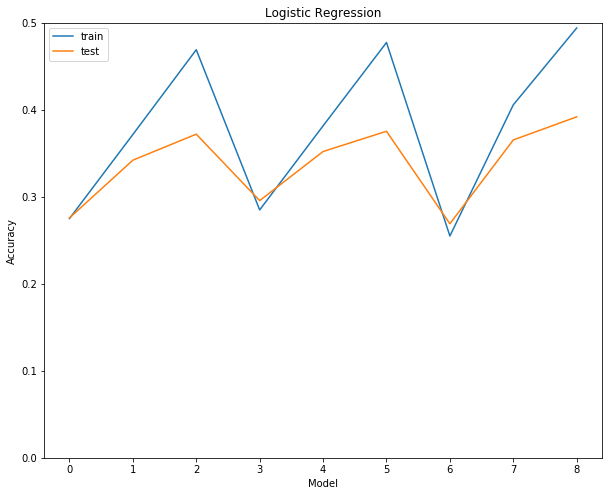

In [213]:
try:
    os.stat("NB3_graph")
except:
    os.mkdir("NB3_graph")  

plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(logistic)) - 0.2, logistic.accuracy_train, width=0.4, align='center')
plt.bar(np.arange(len(logistic)) + 0.2, logistic.accuracy_test, width=0.4, align='center')

plt.title("Logistic Regression")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 0.5)
plt.legend(["train", "test"])
plt.savefig("NB3_graph/Logistic1.jpg")
plt.figure(figsize=(10, 8))
plt.plot(np.arange(len(logistic)), logistic.accuracy_train)
plt.plot(np.arange(len(logistic)), logistic.accuracy_test)
plt.title("Logistic Regression")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 0.5)
plt.legend(["train", "test"])
plt.savefig("NB3_graph/Logistic2.jpg")

In [214]:
max_pos = np.argmax(logistic.accuracy_test.values)
print("Best accuracy on test: {}".format(logistic.classifier[max_pos]))
print("Train accuracy: {}".format(logistic.accuracy_train[max_pos]))
print("Test accuracy: {}".format(logistic.accuracy_test[max_pos]))

Best accuracy on test: LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Train accuracy: 0.49416666666666664
Test accuracy: 0.3920265780730897


### K-nearest Neighbors

In [215]:
from sklearn.neighbors import KNeighborsClassifier

accuracy_train = []
accuracy_test = []
classifier = []

n_neighbors = np.arange(3, 30, 2)
for k in n_neighbors:
    KNN = KNeighborsClassifier(n_neighbors=k)
    fit_predict(KNN)

..............

In [216]:
knn = pd.DataFrame({
    "accuracy_train": accuracy_train,
    "accuracy_test": accuracy_test,
    "classifier": classifier})
knn.head()

,accuracy_train,accuracy_test,classifier
0,0.607500,0.325581,"KNeighborsClassifier(algorithm='auto', leaf_si..."
1,0.543333,0.332226,"KNeighborsClassifier(algorithm='auto', leaf_si..."
2,0.500833,0.332226,"KNeighborsClassifier(algorithm='auto', leaf_si..."
3,0.480000,0.328904,"KNeighborsClassifier(algorithm='auto', leaf_si..."
4,0.471667,0.345515,"KNeighborsClassifier(algorithm='auto', leaf_si..."


In [217]:
for i in range(len(classifier)):
    knn_y_predict = pd.DataFrame({
        "pred": y_predict_test[i],
        "actual": y_test.iloc[i]})
    knn_y_predict.to_hdf("NB3_df/knn_y_predict" + "_c" + str(i + 1) + ".h5", "data", mode="w")
knn_y_predict.head()

,pred,actual
0,17.0,16.0
1,13.0,16.0
2,12.0,16.0
3,8.0,16.0
4,5.0,16.0


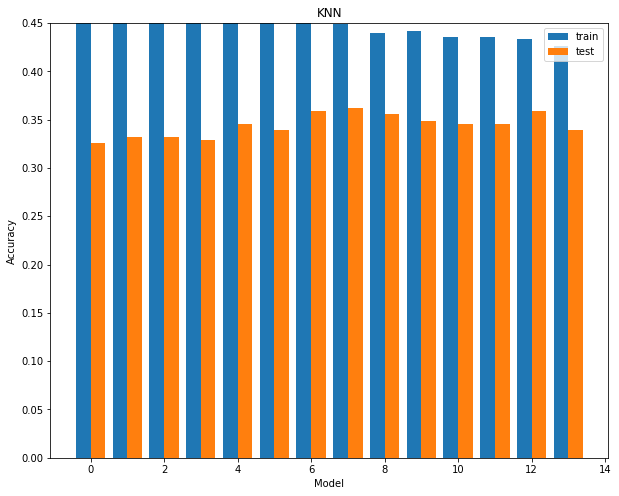

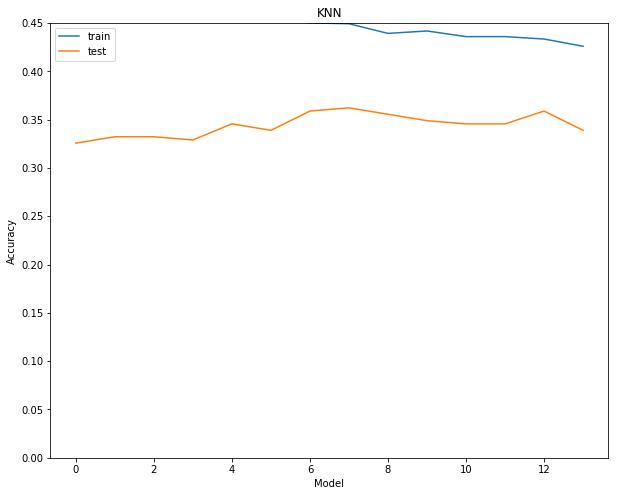

In [218]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(knn)) - 0.2, knn.accuracy_train, width=0.4, align='center')
plt.bar(np.arange(len(knn)) + 0.2, knn.accuracy_test, width=0.4, align='center')
plt.title("KNN")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 0.45)
plt.legend(["train", "test"])
plt.savefig("NB3_graph/KNN1.jpg")

plt.figure(figsize=(10, 8))
plt.plot(np.arange(len(knn)), knn.accuracy_train)
plt.plot(np.arange(len(knn)), knn.accuracy_test)
plt.title("KNN")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 0.45)
plt.legend(["train", "test"])
plt.savefig("NB3_graph/KNN2.jpg")

In [219]:
max_pos = np.argmax(knn.accuracy_test.values)
print("Best accuracy on test: {}".format(knn.classifier[max_pos]))
print("Train accuracy: {}".format(knn.accuracy_train[max_pos]))
print("Test accuracy: {}".format(knn.accuracy_test[max_pos]))

Best accuracy on test: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')
Train accuracy: 0.44916666666666666
Test accuracy: 0.36212624584717606


### Classification Tree

In [220]:
from sklearn.tree import DecisionTreeClassifier

accuracy_train = []
accuracy_test = []
classifier = []

for c in ['gini', 'entropy']:
    for s in ['best', 'random']:
        for min_s in np.arange(3, 10):
            DecisionTree = DecisionTreeClassifier(criterion=c, splitter = s, min_samples_split=min_s)
            fit_predict(DecisionTree)

............................

In [221]:
dt = pd.DataFrame({
    "accuracy_train": accuracy_train,
    "accuracy_test": accuracy_test,
    "classifier": classifier})
dt.head()

,accuracy_train,accuracy_test,classifier
0,0.944167,0.308970,"DecisionTreeClassifier(class_weight=None, crit..."
1,0.894167,0.312292,"DecisionTreeClassifier(class_weight=None, crit..."
2,0.850000,0.308970,"DecisionTreeClassifier(class_weight=None, crit..."
3,0.814167,0.315615,"DecisionTreeClassifier(class_weight=None, crit..."
4,0.776667,0.312292,"DecisionTreeClassifier(class_weight=None, crit..."


In [222]:
for i in range(len(classifier)):
    dt_y_predict = pd.DataFrame({
        "pred": y_predict_test[i],
        "actual": y_test.iloc[i]})
    dt_y_predict.to_hdf("NB3_df/dt_y_predict" + "_c" + str(i + 1) + ".h5", "data", mode="w")
dt_y_predict.head()

,pred,actual
0,5.0,18.0
1,8.0,18.0
2,12.0,18.0
3,8.0,18.0
4,19.0,18.0


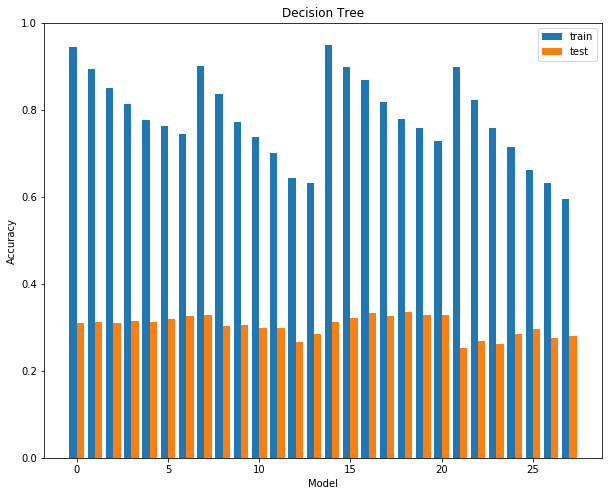

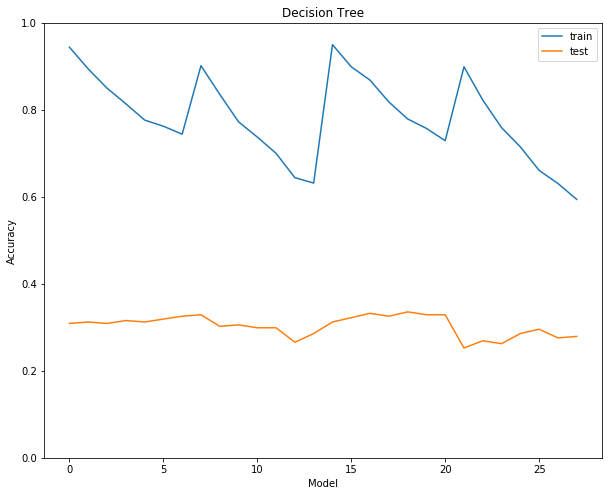

In [223]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(dt)) - 0.2, dt.accuracy_train, width=0.4, align='center')
plt.bar(np.arange(len(dt)) + 0.2, dt.accuracy_test, width=0.4, align='center')
plt.title("Decision Tree")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.legend(["train", "test"])
plt.savefig("NB3_graph/Decision Tree1.jpg")

plt.figure(figsize=(10, 8))
plt.plot(np.arange(len(dt)), dt.accuracy_train)
plt.plot(np.arange(len(dt)), dt.accuracy_test)
plt.title("Decision Tree")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.legend(["train", "test"])
plt.savefig("NB3_graph/Decision Tree2.jpg")

In [224]:
max_pos = np.argmax(dt.accuracy_test.values)
print("Best accuracy on test: {}".format(dt.classifier[max_pos]))
print("Train accuracy: {}".format(dt.accuracy_train[max_pos]))
print("Test accuracy: {}".format(dt.accuracy_test[max_pos]))

Best accuracy on test: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Train accuracy: 0.7791666666666667
Test accuracy: 0.33554817275747506


### Random Forest

In [225]:
from sklearn.ensemble import RandomForestClassifier

accuracy_train = []
accuracy_test = []
classifier = []

for n in np.arange(10, 100, 20):
    for d in np.arange(2, 8):
        RandomForest = RandomForestClassifier(n_estimators=n, max_depth=d)
        fit_predict(RandomForest)

..............................

In [226]:
rf = pd.DataFrame({
    "accuracy_train": accuracy_train,
    "accuracy_test": accuracy_test,
    "classifier": classifier})
rf.head()

,accuracy_train,accuracy_test,classifier
0,0.263333,0.282392,"(DecisionTreeClassifier(class_weight=None, cri..."
1,0.313333,0.312292,"(DecisionTreeClassifier(class_weight=None, cri..."
2,0.338333,0.308970,"(DecisionTreeClassifier(class_weight=None, cri..."
3,0.405833,0.338870,"(DecisionTreeClassifier(class_weight=None, cri..."
4,0.482500,0.335548,"(DecisionTreeClassifier(class_weight=None, cri..."


In [227]:
for i in range(len(classifier)):
    rf_y_predict = pd.DataFrame({
        "pred": y_predict_test[i],
        "actual": y_test.iloc[i]})
    rf_y_predict.to_hdf("NB3_df/rf_y_predict" + "_c" + str(i + 1) + ".h5", "data", mode="w")
rf_y_predict.head()

,pred,actual
0,5.0,12.0
1,8.0,12.0
2,12.0,12.0
3,8.0,12.0
4,19.0,12.0


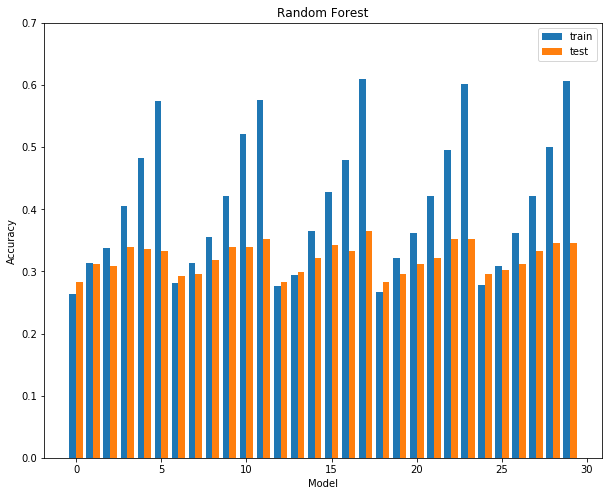

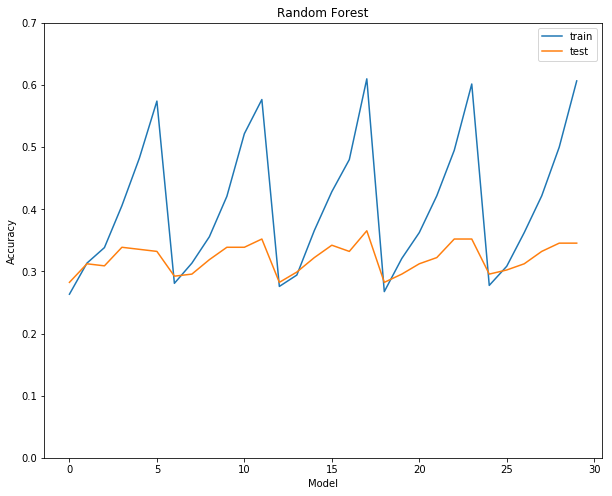

In [228]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(rf)) - 0.2, rf.accuracy_train, width=0.4, align='center')
plt.bar(np.arange(len(rf)) + 0.2, rf.accuracy_test, width=0.4, align='center')
plt.title("Random Forest")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 0.7)
plt.legend(["train", "test"])
plt.savefig("NB3_graph/Random Forest1.jpg")

plt.figure(figsize=(10, 8))
plt.plot(np.arange(len(rf)), rf.accuracy_train)
plt.plot(np.arange(len(rf)), rf.accuracy_test)
plt.title("Random Forest")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 0.7)
plt.legend(["train", "test"])
plt.savefig("NB3_graph/Random Forest2.jpg")

In [229]:
max_pos = np.argmax(rf.accuracy_test.values)
print("Best accuracy on test: {}".format(rf.classifier[max_pos]))
print("Train accuracy: {}".format(rf.accuracy_train[max_pos]))
print("Test accuracy: {}".format(rf.accuracy_test[max_pos]))

Best accuracy on test: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Train accuracy: 0.61
Test accuracy: 0.3654485049833887


### Support Vector Machine

In [230]:
from sklearn.svm import SVC

accuracy_train = []
accuracy_test = []
classifier = []

for k in ['linear', 'rbf', 'sigmoid', 'rbf']:
    for c in [5, 10, 20]:
        SVM = SVC(C=c, kernel=k, random_state=42)
        fit_predict(SVM)
        print(c, k)

.5 linear
.10 linear
.20 linear
.5 rbf


/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


.10 rbf
.20 rbf


/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


.5 sigmoid


/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


.10 sigmoid


/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


.20 sigmoid


/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


.5 rbf


/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


.10 rbf


/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


.20 rbf


In [231]:
svm = pd.DataFrame({
    "accuracy_train": accuracy_train,
    "accuracy_test": accuracy_test,
    "classifier": classifier})
svm.head()

,accuracy_train,accuracy_test,classifier
0,0.485000,0.368771,"SVC(C=5, cache_size=200, class_weight=None, co..."
1,0.499167,0.388704,"SVC(C=10, cache_size=200, class_weight=None, c..."
2,0.516667,0.408638,"SVC(C=20, cache_size=200, class_weight=None, c..."
3,0.336667,0.342193,"SVC(C=5, cache_size=200, class_weight=None, co..."
4,0.398333,0.348837,"SVC(C=10, cache_size=200, class_weight=None, c..."


In [232]:
for i in range(len(classifier)):
    svm_y_predict = pd.DataFrame({
        "pred": y_predict_test[i],
        "actual": y_test.iloc[i]})
    svm_y_predict.to_hdf("NB3_df/svm_y_predict" + "_c" + str(i + 1) + ".h5", "data", mode="w")
svm_y_predict.head()

,pred,actual
0,17.0,4.0
1,13.0,4.0
2,12.0,4.0
3,8.0,4.0
4,4.0,4.0


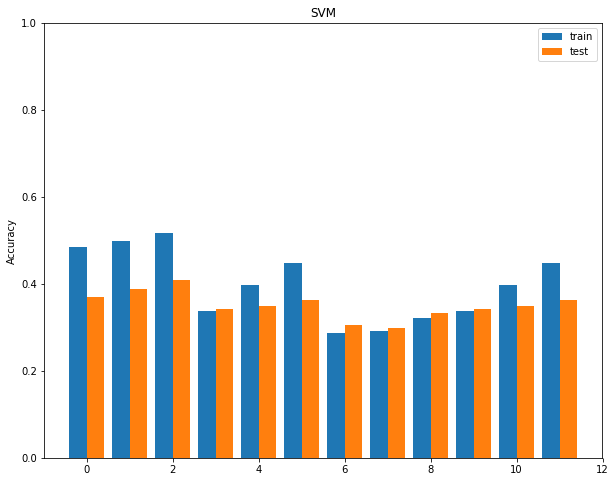

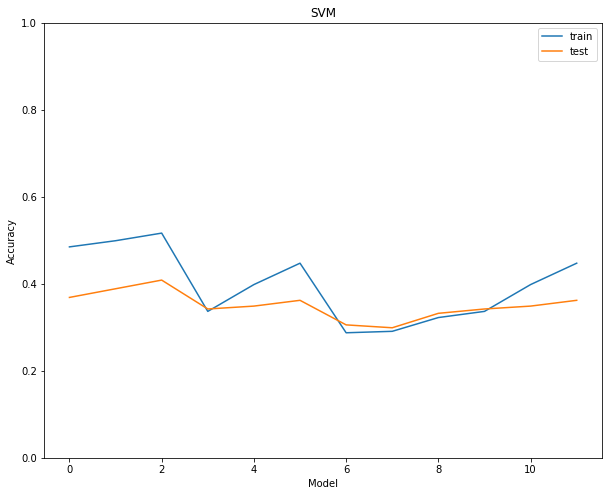

In [233]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(svm)) - 0.2, svm.accuracy_train, width=0.4, align='center')
plt.bar(np.arange(len(svm)) + 0.2, svm.accuracy_test, width=0.4, align='center')

plt.title("SVM")
plt.ylabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.legend(["train", "test"])
plt.savefig("SVM1.jpg")

plt.figure(figsize=(10, 8))
plt.plot(np.arange(len(svm)), svm.accuracy_train)
plt.plot(np.arange(len(svm)), svm.accuracy_test)
plt.title("SVM")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.legend(["train", "test"])
plt.savefig("SVM2.jpg")

In [234]:
max_pos = np.argmax(svm.accuracy_test.values)
print("Best accuracy on test: {}".format(svm.classifier[max_pos]))
print("Train accuracy: {}".format(svm.accuracy_train[max_pos]))
print("Test accuracy: {}".format(svm.accuracy_test[max_pos]))

Best accuracy on test: SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)
Train accuracy: 0.5166666666666667
Test accuracy: 0.40863787375415284
